## Collecting Data

In [6]:
import yfinance as yf
import pandas as pd

In [4]:
monster = yf.Ticker("MNST").history(start="2025-09-01", end="2025-09-10", interval="1d")
pepper = yf.Ticker("KDP").history(start="2025-09-01", end="2025-09-10", interval="1d")
pepsi = yf.Ticker("PEP").history(start="2025-09-01", end="2025-09-10", interval="1d")
coke = yf.Ticker("COKE").history(start="2025-09-01", end="2025-09-10", interval="1d")

In [5]:
coke.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-09-02 00:00:00-04:00,116.750000,117.800003,115.870003,116.940002,453300,0.0,0.0
2025-09-03 00:00:00-04:00,116.519997,117.279999,115.410004,117.190002,336200,0.0,0.0


## 0. Bernoulli, Binomial, and Poisson Distributions

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, binom, poisson
import numpy as np

### Bernoulli

#### Generating Bernoulli Random Variables

In [13]:
# Define the probability of success (p)
p = 0.7

# Generate a single Bernoulli trial outcome
single_outcome = bernoulli.rvs(p)
print(f"Single Bernoulli outcome: {single_outcome}")

Single Bernoulli outcome: 1


In [14]:
# Generate multiple Bernoulli trial outcomes
num_samples = 20
samples = bernoulli.rvs(p, size=num_samples)
print(f"Multiple Bernoulli samples: {samples}")

Multiple Bernoulli samples: [0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1]


#### Calculating Probability Mass Function (PMF)

In [15]:
# Probability of failure (x=0)
prob_failure = bernoulli.pmf(0, p)
print(f"Probability of failure (0): {prob_failure}")

Probability of failure (0): 0.30000000000000004


In [16]:
# Probability of success (x=1)
prob_success = bernoulli.pmf(1, p)
print(f"Probability of success (1): {prob_success}")

Probability of success (1): 0.7


#### Calculating Cumulative Distribution Function (CDF)

In [17]:
# CDF at 0 (probability of failure or less)
cdf_at_0 = bernoulli.cdf(0, p)
print(f"CDF at 0: {cdf_at_0}")

CDF at 0: 0.30000000000000004


In [8]:
# CDF at 1 (probability of success or less)
cdf_at_1 = bernoulli.cdf(1, p)
print(f"CDF at 1: {cdf_at_1}")

CDF at 1: 1.0


#### Visualizing Bernoulli Distribution

In [9]:
p = 0.7
num_samples = 1000
samples = bernoulli.rvs(p, size=num_samples)

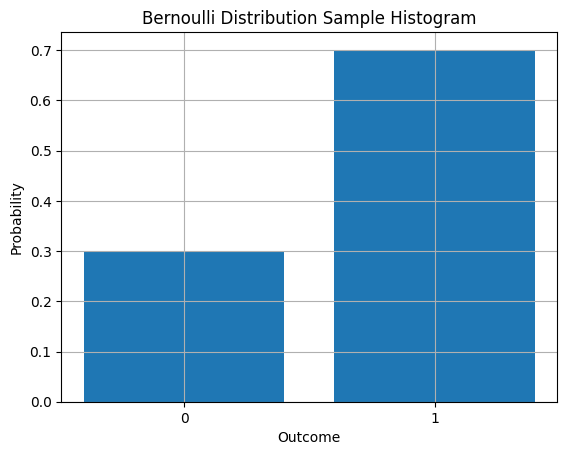

In [10]:
# Plotting the histogram of generated samples
plt.hist(samples, bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.8, density=True)
plt.xticks([0, 1])
plt.title('Bernoulli Distribution Sample Histogram')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

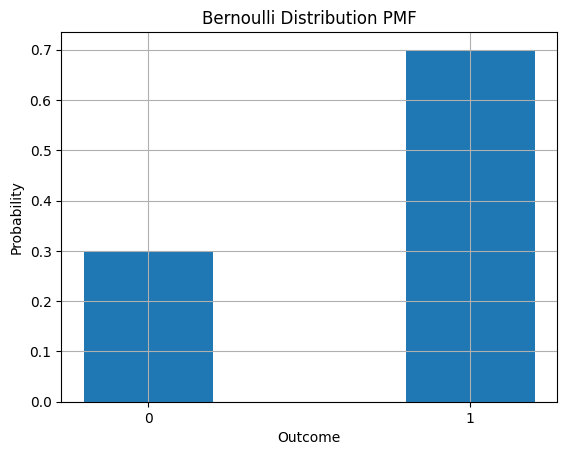

In [11]:
# Plotting the PMF
outcomes = [0, 1]
pmf_values = [bernoulli.pmf(0, p), bernoulli.pmf(1, p)]
plt.bar(outcomes, pmf_values, width=0.4)
plt.xticks([0, 1])
plt.title('Bernoulli Distribution PMF')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

### Binomial

he probability of getting exactly $k$ successes in $n$ independent Bernoulli trials (with the same rate $p$) is given by the probability mass function:
$$\binom{n}{k}p^k(1-p)^{n-k}$$
where $\binom{n}{k} = \frac{n!}{k!(n-k)!}$

#### Generating Random Samples

In [23]:
# Generate 10 random samples from a binomial distribution
# with 10 trials and a 0.5 probability of success
samples = np.random.binomial(n=10, p=0.6, size=10)
print(samples)

[7 6 4 8 5 7 8 7 4 6]


#### Calculating Probabilities (PMF and CDF)

In [8]:
# Probability of getting exactly 3 heads in 5 coin flips
pmf_value = binom.pmf(k=3, n=5, p=0.5)
print(f"Probability of exactly 3 heads: {pmf_value}")

Probability of exactly 3 heads: 0.31249999999999983


In [9]:
# Probability of getting 2 or fewer heads in 5 coin flips
cdf_value = binom.cdf(k=2, n=5, p=0.5)
print(f"Probability of 2 or fewer heads: {cdf_value}")

Probability of 2 or fewer heads: 0.5


#### Visualizing the Distribution

In [20]:
n = 10  # Number of trials
p = 0.6 # Probability of success

# Create an array of possible number of successes
k_values = np.arange(0, n + 1)

# Calculate the PMF for each k_value
pmf_values = binom.pmf(k_values, n, p)

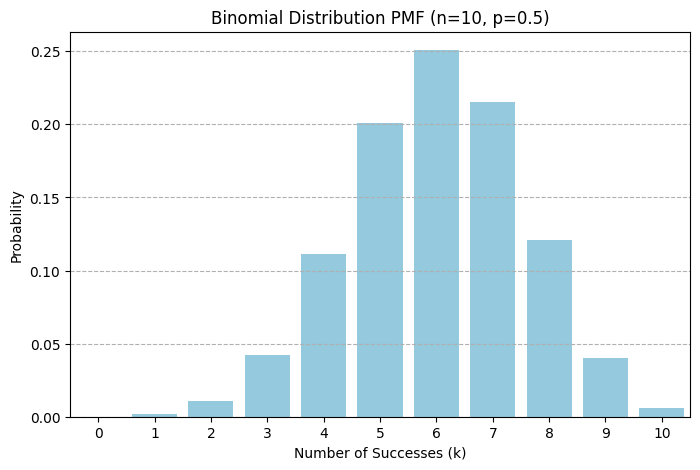

In [21]:
# Plot the PMF
plt.figure(figsize=(8, 5))
sns.barplot(x=k_values, y=pmf_values, color='skyblue')
plt.title('Binomial Distribution PMF (n=10, p=0.5)')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--')
plt.show()

In [28]:
samples = np.random.binomial(n=10, p=0.6, size=1000)

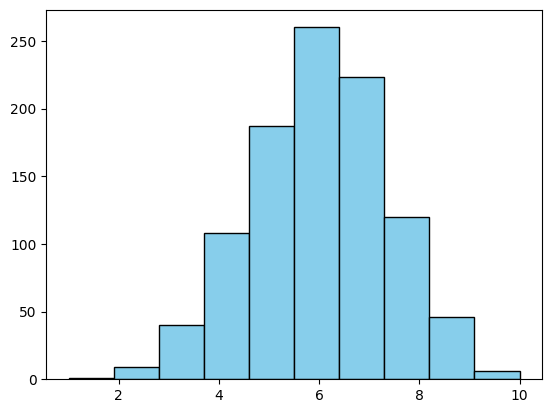

In [31]:
plt.hist(samples, bins=10, edgecolor='black', color='skyblue') # bins=30 creates 30 equal-width bins
plt.show()

### Financial excercises

#### Cash Flow Forecasting

**Scenario**: A company has 50 clients, and each client has a 90% chance of making their payment on time. 

**Question**: What is the probability of receiving payments from exactly 48 clients?

**Application**: Use the binomial formula with n=50, r=48, and p=0.90 to find the probability, helping with liquidity management. 


In [39]:
pmf_value = binom.pmf(k=48, n=50, p=0.9)
print(f"The probability of receiving payments from exactly 48 clients: {pmf_value}")

The probability of receiving payments from exactly 48 clients: 0.07794289665391535


In [40]:
n = 50  # Number of clients
p = 0.9 # Probability of making payment on time

# Create an array of possible number of successes
k_values = np.arange(0, n + 1)

# Calculate the PMF for each k_value
pmf_values = binom.pmf(k_values, n, p)

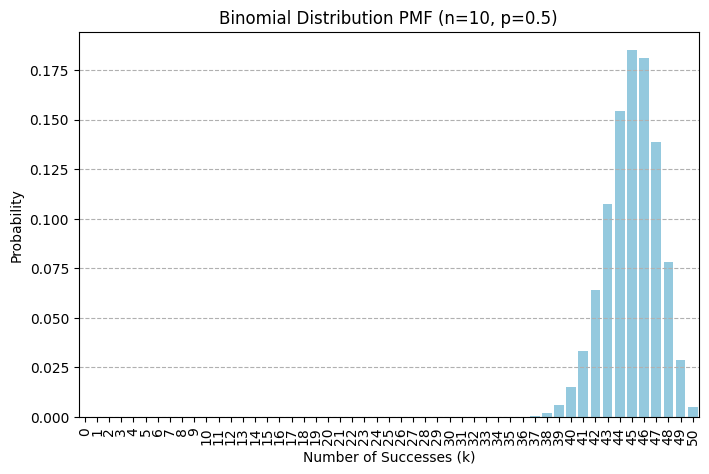

In [42]:
# Plot the PMF
plt.figure(figsize=(8, 5))
sns.barplot(x=k_values, y=pmf_values, color='skyblue')
plt.xticks(rotation=90)
plt.title('Binomial Distribution PMF (n=10, p=0.5)')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--')
plt.show()

#### Credit Risk Assessment

**Scenario**: A bank holds 100 loans, and each loan has a 5% chance of defaulting. 

**Question**: What is the probability that exactly 3 of these loans will default?

**Application**: Apply the binomial distribution with n=100, r=3, and p=0.05 to estimate the number of defaults and assess overall risk.

In [44]:
pmf_value = binom.pmf(k=3, n=100, p=0.05)
print(f"The probability that exactly 3 of these loans will default: {pmf_value}")

The probability that exactly 3 of these loans will default: 0.13957567793089534


In [33]:
p0 = binom.pmf(k=0, n=100, p=0.05)
p0

np.float64(0.005920529220334024)

In [34]:
p1 = binom.pmf(k=1, n=100, p=0.05)
p1

np.float64(0.031160680107021173)

In [35]:
p2 = binom.pmf(k=2, n=100, p=0.05)
p2

np.float64(0.08118177185776576)

In [36]:
p3 = binom.pmf(k=3, n=100, p=0.05)
p3

np.float64(0.13957567793089534)

In [37]:
p0+p1+p2+p3

np.float64(0.25783865911601633)

In [38]:
cdf_value = binom.cdf(k=3, n=100, p=0.05)
cdf_value

np.float64(0.2578386591160152)

In [45]:
n = 100  # Number of clients
p = 0.05 # Probability of making payment on time

# Create an array of possible number of successes
k_values = np.arange(0, n + 1)

# Calculate the PMF for each k_value
pmf_values = binom.pmf(k_values, n, p)

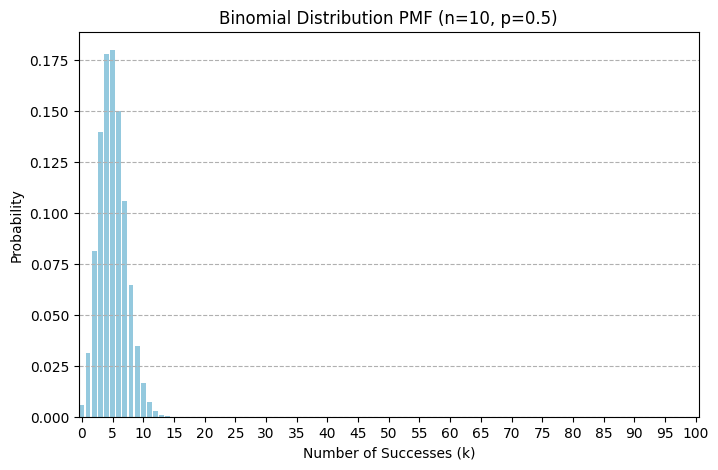

In [48]:
# Plot the PMF
plt.figure(figsize=(8, 5))
sns.barplot(x=k_values, y=pmf_values, color='skyblue')
plt.xticks(np.arange(0, 101, step=5))  # Set label locations.
# plt.xticks(rotation=90)
plt.title('Binomial Distribution PMF (n=10, p=0.5)')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--')
plt.show()

#### Credit risk: Loan portfolio default probability

A bank has a portfolio of 20 independent personal loans. The historical probability of any single customer defaulting on a loan is 10%.

In [18]:
# Determine the number of trials (\(n\)) and the probability of success (\(p\)). A "success" in this case is a loan default.
n=20
p=0.1
q=1-p

In [19]:
# Calculate the probability of a specific outcome: 
# Find the probability that exactly 3 customers in the portfolio will default.
pmf_value = binom.pmf(k=3, n=n, p=p)
print(f"chance of exactly 3 customers defaulting: {pmf_value}")

chance of exactly 3 customers defaulting: 0.19011987137619904


In [21]:
# Calculate the cumulative probability: 
# Find the probability that no more than 2 customers will default.
cdf_value = binom.cdf(k=2, n=n, p=p)
print(f"chance of 2 or fewer customers defaulting: {cdf_value}")

chance of 2 or fewer customers defaulting: 0.6769268051894659


In [26]:
# Calculate the mean and standard deviation: 
# Determine the expected number of defaults and the spread of possible outcomes.
mean, variance = binom.stats(n, p)
print(f"mean: {mean}\n standard deviation: {binom.std(n, p)}")

mean: 2.0
 standard deviation: 1.3416407864998738


In [ ]:
binom.me

In [39]:
1-binom.cdf(k=14, n=20, p=0.6)

np.float64(0.12559897272303744)

#### Option pricing: The single-period binomial model

A stock is currently trading at $50. 
In one year, its price is expected to either increase by 20% or decrease by 10%. 
A European call option on this stock has a strike price of $52 and an expiration date of one year. 
The annual risk-free interest rate is 5%.

In [ ]:
# Construct the binomial tree
u = 50 * (1+0.2)
d = 50 * (1-0.1)


45.0

In [29]:
# Calculate the option's payoffs
Cu = max(u - 52, 0)
Cd = max(d - 52, 0)
print(f"Up-state payoff (Cu): {Cu}")
print(f"Down-state payoff (Cd): {Cd}")

Up-state payoff (Cu): 8.0
Down-state payoff (Cd): 0


In [28]:
# Find the risk-neutral probability (\(p\))
r=0.05
p = ((1+r)*50-d)/(u-d)
p

0.5

In [30]:
# Value the call option (\(C_{0}\))
C0 = (p*Cu+(1-p)*Cd)/(1+r)
C0

3.8095238095238093

### Poisson

The Poisson distribution is a discrete probability distribution that models the number of events occurring within a fixed interval of time or space, given a known constant average rate of occurrence and independence of events.

Under a Poisson distribution with the expectation of $\lambda$ events in a given interval, the probability of $k$ events in the same interval is

$$\frac{\lambda^ke^{-\lambda}}{k!}$$

#### Generating Random Samples

**Lambda (λ)**: The average rate at which events occur within the given interval. This is the single parameter that characterizes the Poisson distribution

In [33]:
# Example: Generate 1000 random samples with lambda = 5
lam = 5
samples = poisson.rvs(lam, size=1000)
print(f"First 10 samples: {samples[:10]}")

First 10 samples: [5 8 2 3 3 9 2 7 5 4]


#### Probability Mass Function (PMF)

In [35]:
# Example: Probability of 3 events when lambda is 5
lam = 5
k = 3
probability = poisson.pmf(k, lam)
print(f"P(X={k} | λ={lam}) = {probability}")

P(X=3 | λ=5) = 0.1403738958142805


#### Cumulative Distribution Function (CDF)

In [34]:
 # Example: Probability of 3 or fewer events when lambda is 5
lam = 5
k = 3
cumulative_probability = poisson.cdf(k, lam)
print(f"P(X<={k} | λ={lam}) = {cumulative_probability}")

P(X<=3 | λ=5) = 0.2650259152973616


#### Plotting the Distribution

In [36]:
lam = 3
x = np.arange(0, 10)  # Range of possible events
pmf_values = poisson.pmf(x, lam)

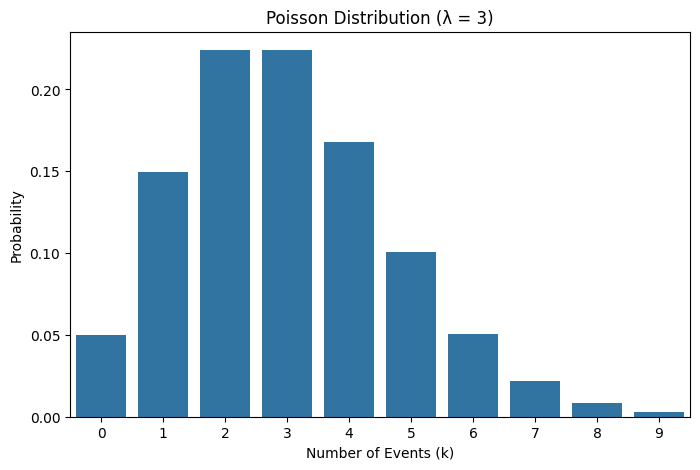

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(x=x, y=pmf_values)
plt.title(f'Poisson Distribution (λ = {lam})')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.show()

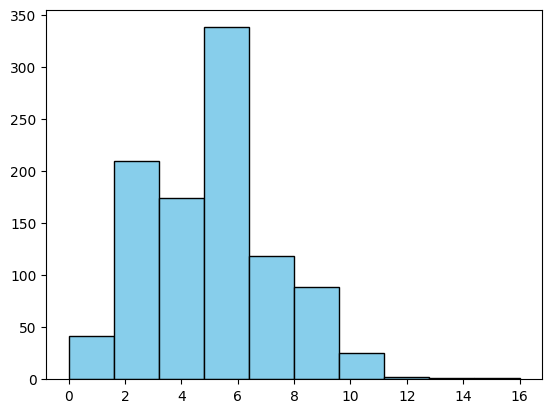

In [38]:
plt.hist(samples, bins=10, edgecolor='black', color='skyblue') # bins=30 creates 30 equal-width bins
plt.show()

#### Financial Excercises

##### Credit risk modeling for a loan portfolio

A bank has a large portfolio of consumer loans. Based on historical data, the average number of loan defaults in this portfolio is 3 per quarter. Assuming defaults occur randomly and independently, a Poisson distribution is a suitable model.

In [5]:
# What is the probability of having exactly 2 defaults in the next quarter?
lam = 3
k = 4
probability = poisson.pmf(k, lam)
print(f"P(X={k} | λ={lam}) = {probability}")

P(X=4 | λ=3) = 0.16803135574154085


In [6]:
# What is the probability of having more than 5 defaults in the next quarter?
lam = 3
k = 4
cumulative_probability = poisson.cdf(k, lam)
print(f"P(X<={k} | λ={lam}) = {cumulative_probability}")


P(X<=4 | λ=3) = 0.8152632445237722


In [7]:
print(f"P(X > {k} | λ={lam}) = {1-cumulative_probability}")

P(X > 4 | λ=3) = 0.1847367554762278


In [4]:
print(f"P(X = {10} | λ={6}) = {poisson.pmf(10, 6)}")

P(X = 10 | λ=6) = 0.04130309341233764


In [19]:
print(f"P(X = {7} | λ={5}) = {poisson.pmf(7, 5)}")

P(X = 7 | λ=5) = 0.10444486295705395


In [20]:
print(f"P(X > {7} | λ={5}) = {1- poisson.cdf(7, 5)}")

P(X > 7 | λ=5) = 0.1333716740700075


In [21]:
print(f"P(X > {1} | λ={0.25}) = {1- poisson.cdf(1, 0.25)}")

P(X > 1 | λ=0.25) = 0.026499021160743874


In [25]:
print(f"P(X > {1} | λ={0.8}) = {1- poisson.cdf(1, 0.8)}")

P(X > 1 | λ=0.8) = 0.19120786458900108


In [26]:
print(f"P(X = {0} | λ={0.4}) = {poisson.pmf(0, 0.4)}")

P(X = 0 | λ=0.4) = 0.6703200460356393


In [27]:
print(f"P(X = {5} | λ={3}) = {poisson.pmf(5, 3)}")

P(X = 5 | λ=3) = 0.10081881344492458


##### Operational risk in a financial institution

A fintech company's trading server experiences an average of 1.2 system failures per month. The failures are rare and occur randomly.

In [55]:
# What is the probability of exactly 3 system failures next month?
lam = 1.2
k = 3
probability = poisson.pmf(k, lam)
print(f"P(X={k} | λ={lam}) = {probability}")

P(X=3 | λ=1.2) = 0.08674393303071422


In [56]:
# What is the probability of fewer than 2 system failures next month?
lam = 1.2
k = 2
cumulative_probability = poisson.cdf(k-1, lam)
print(f"P(X<={k} | λ={lam}) = {cumulative_probability}")

P(X<=2 | λ=1.2) = 0.6626272662068446


In [57]:
# The company defines a "crisis month" as one with 4 or more system failures. 
# What is the probability of a crisis month?
lam = 1.2
k = 4
cumulative_probability = poisson.cdf(k-1, lam)
print(f"P(X<={k-1} | λ={lam}) = {cumulative_probability}")

P(X<=3 | λ=1.2) = 0.9662310318143443


In [58]:
print(f"P(X>={k} | λ={lam}) = {1-cumulative_probability}")

P(X>=4 | λ=1.2) = 0.03376896818565567


##### Insurance claims frequency

An insurance company receives an average of 6 claims per week for a certain type of policy. 
Claims are filed independently and at a constant rate.

In [8]:
# What is the probability of receiving exactly 8 claims next week?
lam = 6
k = 8
probability = poisson.pmf(k, lam)
print(f"P(X={k} | λ={lam}) = {probability}")

P(X=8 | λ=6) = 0.1032577335308442


##### Portfolio rebalancing

An investment analyst uses a statistical model where the number of buy or sell orders for a particular stock follows a Poisson distribution. 
The analyst observes an average of 4 trades per minute during a 10-minute trading period.

In [8]:
# What is the average number of trades over the 10-minute period?
# Average number of trades over the 10-minute period:
10*4

40

In [9]:
# What is the probability of observing exactly 4 trades in a single minute?
lam = 4
k = 5
probability = poisson.pmf(k, lam)
print(f"P(X={k} | λ={lam}) = {probability}")

P(X=5 | λ=4) = 0.1562934518505317


In [9]:
# What is the probability of observing 10 or more trades over the 10-minute period?
lam = 40
k = 10
cumulative_probability = poisson.cdf(k-1, lam)
print(f"P(X<={k-1} | λ={lam}) = {cumulative_probability}")

P(X<=9 | λ=40) = 3.925932226286184e-09


In [10]:
print(f"P(X={2} | λ={1}) = {poisson.pmf(2, 1)}")

P(X=2 | λ=1) = 0.18393972058572114


In [10]:
print(f"P(X>={k} | λ={lam}) = {1-cumulative_probability}")

P(X>=10 | λ=40) = 0.9999999960740678


## 1. Pricing Models

### Simple interest

Common uses include auto loans, short-term loans, and some mortgages.  

The equation
$$FV=PV(1+rn)$$
calculates the future value of an initial investment based on a simple, non-compounding interest rate over a set number of periods. In this formula, the variables represent the following: 


- $FV$ -- future value;
- $PV$ -- present value (or Principal), the initial amount of the investment;
- $n$ -- Number of periods;
- $r$ -- Interest rate: The periodic interest rate (expressed as a decimal)

### Compound Interest

In contrast, the more common formula for future value uses compound interest, which calculates interest on both the principal and any accumulated interest.
$$FV=PV(1+r)^n$$

- $FV$ -- future value;
- $PV$ -- present value (or Principal), the initial amount of the investment;
- $n$ -- the total number of compounding periods;
- $r$ -- Interest rate: The periodic interest rate (expressed as a decimal)

### Effective Interest

$$E = \bigg(1+\frac{i}{n}\bigg)^n - 1$$

- $i$ -- nominal interest rate
- $n$ -- number of compounding periods

### Discounted rate

$$DR = \bigg(\frac{FV}{PV}\bigg)^{1/n}-1$$

**Discounted Cash Flow (DCF)** is used to estimate the value of an investment based on its expected future cash flows. 
Based on the concept of the time value of money, DCF analysis helps assess the viability of a project or investment by calculating the present value of expected future cash flows using a discount rate.

In corporate finance, a **discount rate** is the rate of return used to discount future cash flows back to their present value. 
This rate is often a company’s **Weighted Average Cost of Capital (WACC)**, required rate of return, or the hurdle rate that investors expect to earn relative to the risk of the investment.

In corporate finance, there are only a few types of discount rates that are used to discount future cash flows back to the present. They include:

- **Weighted Average Cost of Capital (WACC)** – for calculating the enterprise value of a firm.
    Investors can include equity shareholders and bondholders.
- **Cost of Equity** – for calculating the equity value of a firm.
    Investors expect a specific rate of return in exchange for taking on the risk of investing in a company.
- **Cost of Debt** – for calculating the value of a bond or fixed-income security. 
    Companies must take on debt to finance their operations and keep the business running. 
    The interest rate they pay on this debt is known as the cost of debt.
- A pre-defined **hurdle rate** – for investing in internal corporate projects. 
    The minimum rate of return on a certain investment or undertaking is known as the hurdle rate. 
    This allows them to make important decisions on whether the venture is a good fit.
- **Risk-Free Rate** – to account for the time value of money

## 2. Modern Portfolio Theory (MPT)

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import bernoulli, binom, poisson
import numpy as np
import random as rm

from hmmlearn import hmm
import pandas as pd

import sympy

In finance, a portfolio, inspired by Harry Markowitz, refers to a collection of financial assets such as stocks, bonds, commodities, and ETFs, aimed at diversification to mitigate risk while maximizing returns.

The **modern portfolio theory (MPT)** is a mathematical framework that’s used to build a portfolio of assets that maximizes the expected return for the collective level of risk.

### yfinance

In [ ]:
portfolio = pd.DataFrame({
    "MNST": monster.Close,
    "KDP": pepper.Close,
    "PEP": pepsi.Close,
    "COKE": coke.Close
})
portfolio.head(2)

In [8]:
portfolio_returns = portfolio.pct_change()
portfolio_returns.head()

,MNST,KDP,PEP,COKE
Date,,,,
2025-09-02 00:00:00-04:00,NaN,NaN,NaN,NaN
2025-09-03 00:00:00-04:00,0.013404,0.006226,-0.010913,0.002138
2025-09-04 00:00:00-04:00,-0.000945,0.005500,-0.011773,0.018090
2025-09-05 00:00:00-04:00,-0.015603,-0.020513,0.006345,0.012572
2025-09-08 00:00:00-04:00,0.008966,-0.035602,-0.031969,0.013989


In [9]:
cov_matrix = portfolio_returns.cov()
cov_matrix

,MNST,KDP,PEP,COKE
MNST,0.000127,0.000044,-0.000096,-0.000040
KDP,0.000044,0.000338,0.000130,-0.000054
PEP,-0.000096,0.000130,0.000280,-0.000057
COKE,-0.000040,-0.000054,-0.000057,0.000058


### Portfolio

In [88]:
ts = np.linspace(0, 1, num=50, endpoint=True)
corrs = np.linspace(-1, 1, num=20, endpoint=True)

In [89]:
sigmas = dict()
mus = dict()

for t in ts:
    for corr in corrs:
        cov_matrix = np.array([[0.15**2, corr*0.15*0.45], [corr*0.15*0.45, 0.45**2]])
        nu = np.array([t, 1-t])
        sigmas[(t, corr)] = np.sqrt(np.transpose(nu) @ cov_matrix @ nu)
        mus[(t, corr)] = 0.12*t+(1-t)*0.2

In [90]:
df = pd.DataFrame({"sigma": sigmas, "mu": mus}).reset_index()
df.columns = ['t', 'corr', 'std', 'mean']
df.head(2)

,t,corr,std,mean
0,0.0,-1.000000,0.45,0.2
1,0.0,-0.894737,0.45,0.2


In [91]:
# sns.scatterplot(x='sigma', y='mu', hue='level_1', style='level_0', data=df)
# # plt.title('Scatter Plot with Hue and Style')
# plt.show()

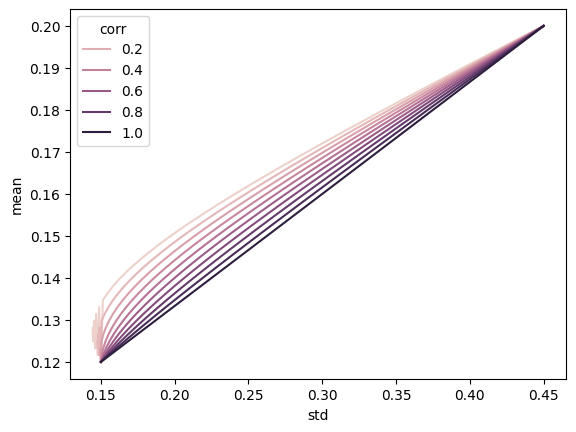

In [93]:
sns.lineplot(data=df[df['corr']>=0], x="std", y="mean", hue="corr")
# plt.title("Passengers over Years by Month")
plt.show()

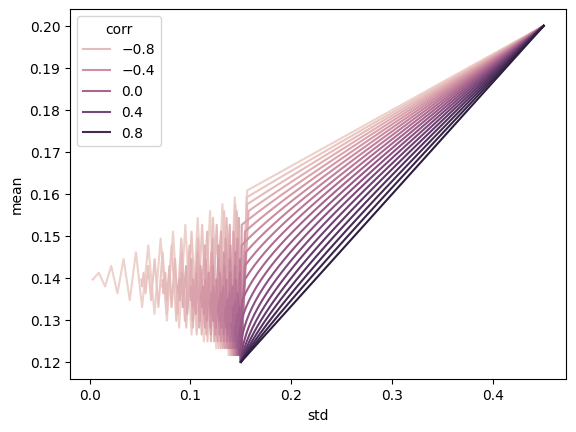

In [94]:
sns.lineplot(data=df, x="std", y="mean", hue="corr")
# plt.title("Passengers over Years by Month")
plt.show()

In [29]:
cov_matrix = np.array([[0.15**2, -0.15*0.45], [-0.15*0.45, 0.45**2]])
nu = np.array([0.1, 0.9])
print(np.transpose(nu) @ cov_matrix @ nu, np.sqrt(np.transpose(nu) @ cov_matrix @ nu))

0.1521 0.39


In [31]:
cov_matrix = np.array([[0.15**2, -0.15*0.45], [-0.15*0.45, 0.45**2]])
nu = np.array([0.4, 0.6])
print(np.transpose(nu) @ cov_matrix @ nu, np.sqrt(np.transpose(nu) @ cov_matrix @ nu))

0.0441 0.21


In [27]:
np.transpose(nu) @ cov_matrix @ nu

np.float64(0.35385000000000005)

In [126]:
cov_matrix = np.array([[0.2**2, 0.5*0.2*0.3], [0.5*0.2*0.3, 0.3**2]])

ts = ts = np.linspace(0, 1, num=150, endpoint=True)

# stds = dict()
stds = []

for t in ts:
    nu = np.array([t, 1-t])
    stds.append( np.transpose(nu) @ cov_matrix @ nu)

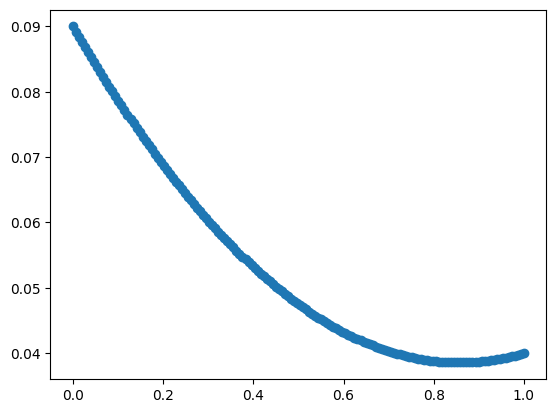

In [127]:
plt.scatter(x=ts, y= stds)
plt.show()


### Portfolio 2

In [117]:
x = sympy.symbols('x')

In [118]:
cov_matrix = np.array([[0.1**2, 0.5*0.1*0.2], [0.5*0.1*0.2, 0.2**2]])
nu = np.array([x, 1-x])
mu = 0.2*x + (1-x)*0.3
sigmas = np.transpose(nu) @ cov_matrix @ nu

In [119]:
sympy.simplify(sigmas)

0.03*x**2 - 0.06*x + 0.04

In [121]:
sympy.solve(sympy.diff(sigmas, x), x)

[1.00000000000000]

In [123]:
sympy.simplify(mu - mu**2 - sigmas)

-0.04*x**2 + 0.02*x + 0.17

In [116]:
sympy.solve(sympy.diff(mu - mu**2 - sigmas, x), x)

[0.250000000000000]

In [122]:
0.2*0.25 + 0.3*0.75

0.27499999999999997

In [103]:
sigmas

np.float64(0.15)

In [125]:
0.03* 0.25**2 - 0.06 * 0.25+0.04

0.026875000000000003

### Martingales

Consider the Binomial asset-pricing model. 
Let $M_0, M_1, ..., M_N$ be a sequence of random variables, with each $M_n$ depending only on the first $n$ coin tosses (and $M_0$ constan).
Such a sequence oof random variables is called an **adapted stochastic process**.

If 
$$M_n = \mathbb{E}_n[M_{n+1}], \ \ \ n=0, 1, ..., N-1,$$
we say this process is a **martingale**.

If 
$$M_n \leq \mathbb{E}_n[M_{n+1}], \ \ \ n=0, 1, ..., N-1,$$
we say this process is a **submartingale** (even though it may have a tendency to increase).

If 
$$M_n \geq \mathbb{E}_n[M_{n+1}], \ \ \ n=0, 1, ..., N-1,$$
we say this process is a **supermartingale** (even though it may have a tendency to decrease).

In [ ]:
# Define the risk-free bond and the risky stock with their respective prices in two states
B = np.array([10, 10])  # Risk-free bond price remains the same in both states
S = np.array([20, 5])  # Risky stock price in an upward state and a downward state

In [ ]:
# The contingent claim we aim to replicate
C1 = np.array([15, 5])  # Payoff of the contingent claim in upward and downward states

# The matrix representing the price processes of the bond and the stock
M = np.array([[B[0], S[0]], [B[1], S[1]]])

In [ ]:
# Solving the replication problem
# We aim to find portfolio weights (phi) such that M * phi = C1
phi = np.linalg.solve(M, C1)

print(f"The replication portfolio weights are: {phi}")

### Markov Process

In [11]:
A = np.array([0.1, 0.12])
B = np.array([0.3, 0.2])
# AB = np.array([[0.1, 0.12], [0.3, 0.2]])
data = np.vstack((A, B))
np.cov(data)

array([[ 0.0002, -0.001 ],
       [-0.001 ,  0.005 ]])

In [19]:
data = {'A': [0.1, 0.5],
        'B': [0.3, 0.2],
        'F':[0, 0.09]}
df = pd.DataFrame(data)
df.cov()

,A,B,F
A,0.080,-0.0200,0.01800
B,-0.020,0.0050,-0.00450
F,0.018,-0.0045,0.00405


In [22]:
np.linalg.inv(np.array([[0.01, 0.015], [0.015, 0.09]]))@ np.array([[0.01, 0.015], [0.015, 0.09]])

array([[1.00000000e+00, 1.29970109e-15],
       [6.20902506e-18, 1.00000000e+00]])

In [ ]:
()

In [17]:
np.sqrt(0.25*0.25 * 0.0025 + 0.75*0.75*0.0225 +2*0.25*0.75*0.0075)

np.float64(0.125)

In [ ]:
# The statespace
states = ["Sleep","Icecream","Run"]

# Possible sequences of events
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

In [4]:
# Example transition matrix for 3 market states (e.g., Low, Mid, High Volatility)
transition_matrix = np.array([
    [0.8, 0.15, 0.05],  # From Low Volatility
    [0.2, 0.6, 0.2],   # From Mid Volatility
    [0.05, 0.25, 0.7]   # From High Volatility
])

### CAPM